<a href="https://colab.research.google.com/github/AghaHuzaifaKhan/Furniture-Sales-Forecast/blob/ANN_Code/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_excel('E-commerce_Dataset102.xlsx')

Saving E-commerce_Dataset102.xlsx to E-commerce_Dataset102 (5).xlsx


In [ ]:
df = df.dropna(subset=['Sales', 'Quantity'])

df_encoded = pd.get_dummies(df, columns=['Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category',
                                         'Product', 'Order_Priority', 'Payment_method'], drop_first=True)

X = df_encoded.drop(['Sales', 'Order_Date'], axis=1)
y = df_encoded['Sales']


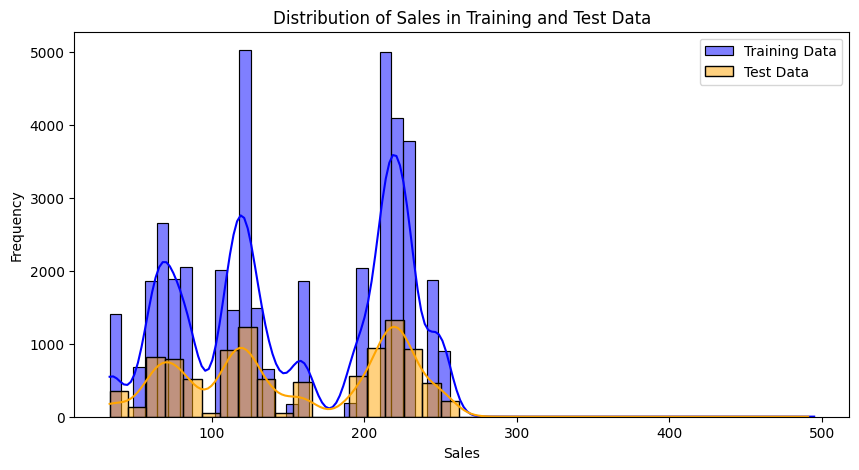

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizing the distribution of sales in training and test datasets
plt.figure(figsize=(10, 5))
sns.histplot(y_train, color='blue', label='Training Data', kde=True)
sns.histplot(y_test, color='orange', label='Test Data', kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in Training and Test Data')
plt.legend()
plt.show()


In [ ]:
# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for training data in one line
print(f"Training Data Evaluation: MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")

# Print the evaluation metrics for test data in one line
print(f"Test Data Evaluation: MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Combine results into a DataFrame for easy visualization
performance_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Mean Absolute Error (MAE)': [train_mae, test_mae],
    'Mean Squared Error (MSE)': [train_mse, test_mse],
    'Root Mean Squared Error (RMSE)': [train_rmse, test_rmse],
    'R-Squared (R2)': [train_r2, test_r2]
})

# Visualizing the comparison of performance metrics between Training and Test datasets
performance_df.set_index('Dataset', inplace=True)

Training Data Evaluation: MAE: 0.09, MSE: 5.70, RMSE: 2.39, R²: 1.00
Test Data Evaluation: MAE: 0.21, MSE: 31.14, RMSE: 5.58, R²: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


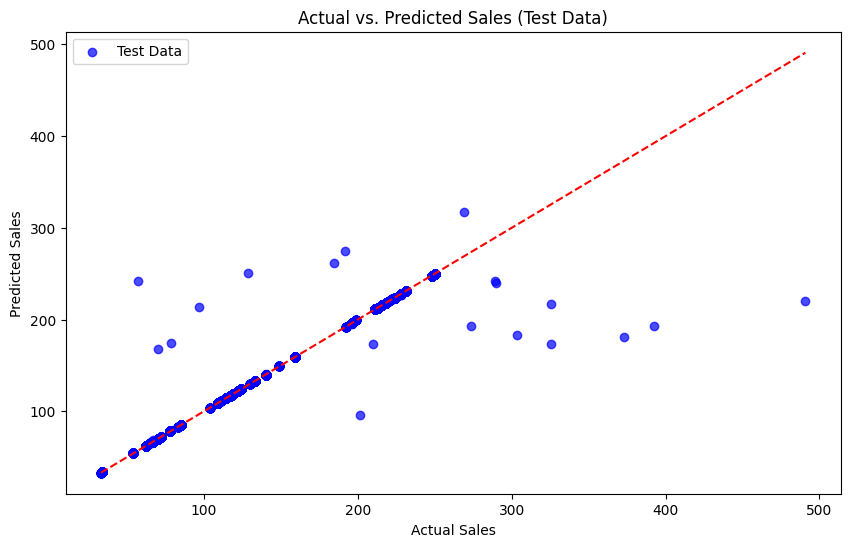

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Test Data)')
plt.legend()
plt.show()


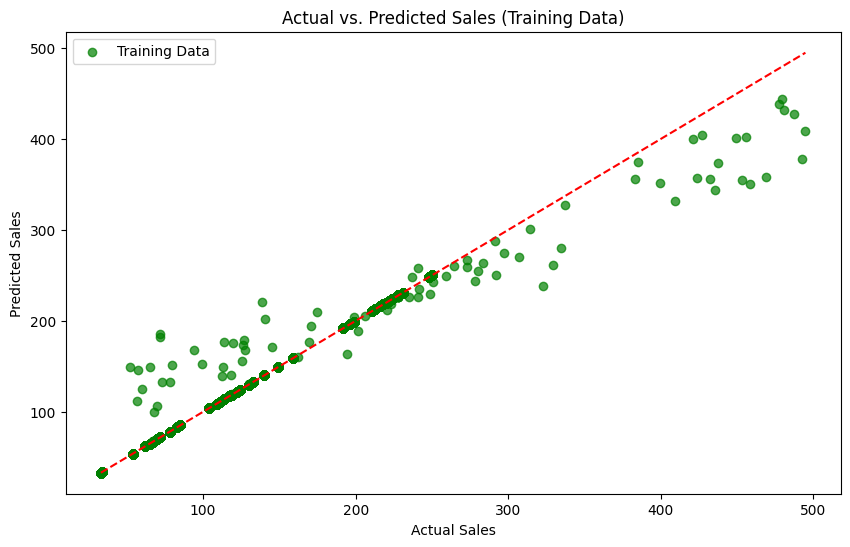

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='g', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Training Data)')
plt.legend()
plt.show()

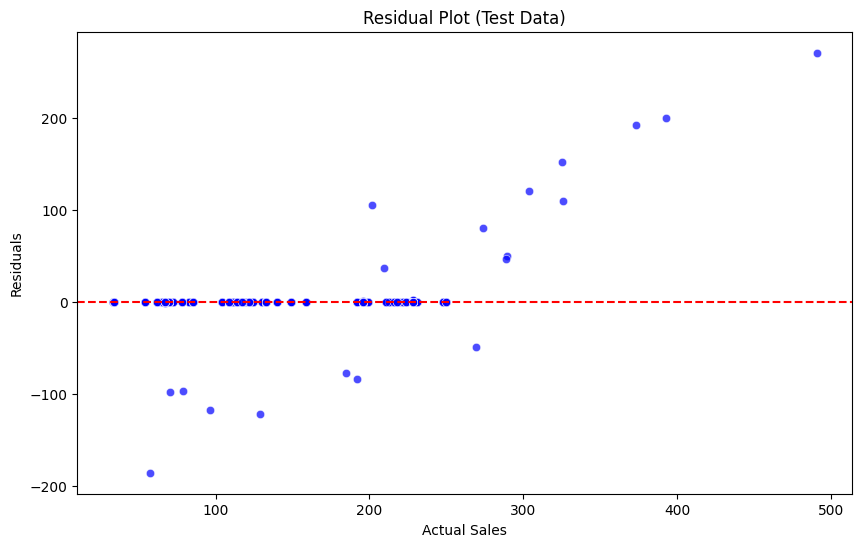

In [ ]:
test_residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_residuals, alpha=0.7, color='b')
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Data)')
plt.show()

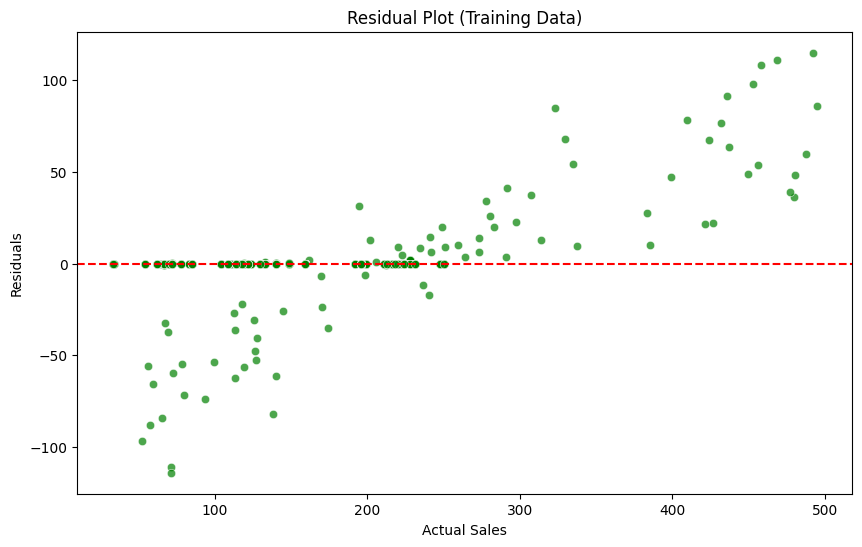

In [ ]:
train_residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=train_residuals, alpha=0.7, color='g')
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Data)')
plt.show()